In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import statsmodels.api as sm


In [2]:
def load_original_data(a):
    df = pd.read_csv(a)
    return df

In [3]:
df=load_original_data('data/df_cleaned.csv') 

In [4]:
df

,Unnamed: 0,sold_price,designer,category,description,sub_title,image_count,feedback_count,size,color,condition,category_group,description_length,sub_title_length
0,6,144.0,Acne Studios,Shirts (Button Ups),"Hi! Never worn condition ,u can see all on a p...",Acne Studios t-shirt,5,11.0,m,Black,New,top,125,3
1,7,70.0,Acne Studios,Sweatshirts & Hoodies,Great condition Size on tag: S (Ladies) ——————...,Acne Studios Lia Mohair SS13 Ladies size S,7,219.0,s,Grey,Gently used,top,147,8
2,11,75.0,Acne Studios,Short Sleeve T-Shirts,"VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...",RARE!!! ACNE Studios size L,7,15.0,l,White,Gently used,top,88,5
3,12,200.0,Acne Studios,Sweaters & Knitwear,Brand new with tags Acne Studios ribbed zip-up...,BNWT $800 Acne Studios M Ribbed Zip Up Knitted...,6,163.0,m,Beige,New,top,89,11
4,14,53.0,Acne Studios,Short Sleeve T-Shirts,Acne Studios Niagara Tee Size: M This tee here...,Acne Studios Black Niagara FL Tee,4,138.0,m,Black,Gently used,top,68,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50461,103423,75.0,Sophnet.,Bags & Luggage,Please ask any question before purchase. This ...,Visvim X Sophnet. SS09 8L Ballistic Weist Bag/...,14,302.0,ONE SIZE,Black_white,Used,accessories,88,9
50462,103427,56.0,Sophnet.,Jewelry & Watches,-Number- 16124 - 0929 42 ・ -Tag Size- OS ・ -Me...,SOPHNET/logo graphic ring/16124 - 0929 42,6,2952.0,ONE SIZE,Silver,Gently used,accessories,129,6
50463,103467,175.0,Sophnet.,Bags & Luggage,PLEASE READ BEFORE BUY!! THIS IS USED CLOTHING...,Visvim Ballistic E-cat 18L Massenger Bag,16,19.0,ONE SIZE,Black,Used,accessories,242,6
50464,103522,80.0,Sophnet.,Bags & Luggage,10/10 Water repellent Delivered as the standou...,Sophnet Carhartt Tote 20 Year Anniversary,2,62.0,ONE SIZE,Black,New,accessories,53,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50466 entries, 0 to 50465
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50466 non-null  int64  
 1   sold_price          50466 non-null  float64
 2   designer            50466 non-null  object 
 3   category            50466 non-null  object 
 4   description         50466 non-null  object 
 5   sub_title           50466 non-null  object 
 6   image_count         50466 non-null  int64  
 7   feedback_count      50466 non-null  float64
 8   size                50466 non-null  object 
 9   color               50466 non-null  object 
 10  condition           50466 non-null  object 
 11  category_group      50466 non-null  object 
 12  description_length  50466 non-null  int64  
 13  sub_title_length    50466 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 5.4+ MB


In [7]:
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : 'white',
                     'ytick.color' : 'white'
                    })


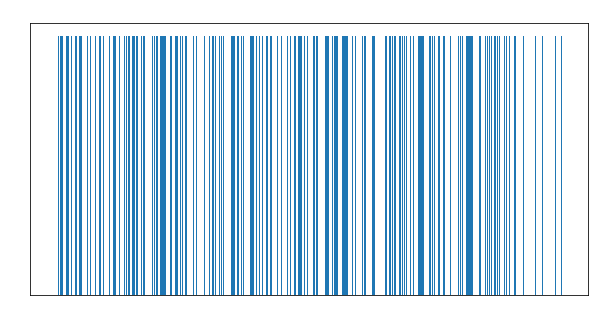

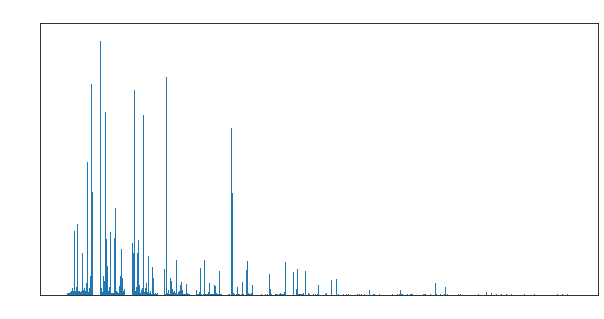

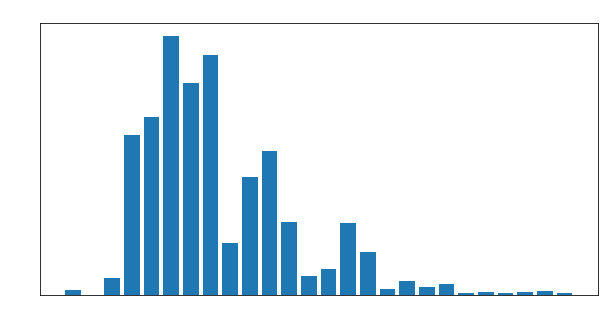

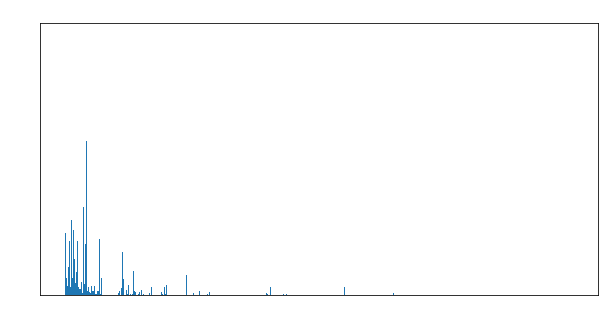

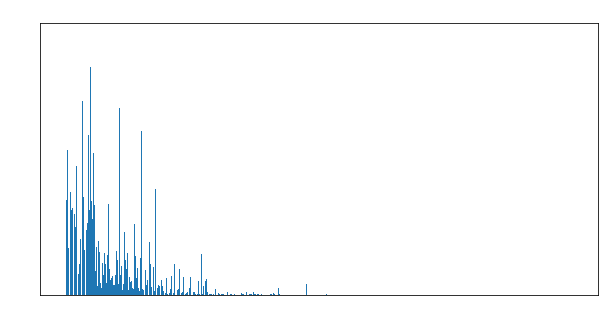

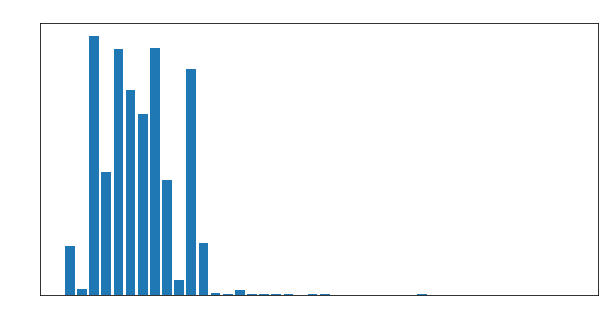

In [9]:
for c in df.select_dtypes(exclude=['object']):
    plt.figure(figsize=(10,5))
    plt.bar(df[c].unique(), df[c].value_counts())
    plt.title(c)
    plt.show();

In [10]:
df.designer.value_counts()

Vintage             13606
Nike                  987
Japanese Brand        647
Adidas                438
Supreme               386
                    ...  
Aero Leather            2
(+) People Jeans        2
Civil Regime            2
Atmos                   1
47                      1
Name: designer, Length: 912, dtype: int64